In [226]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

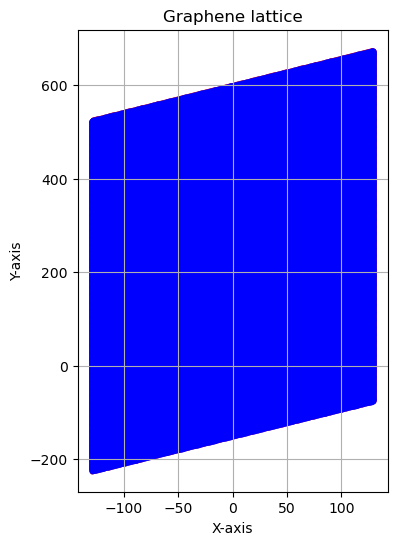

In [227]:
# Defining the Base lattice  - (TRIANGULAR LATICE)
# lattice translation vectors
A1 = [0, 1]
A2 = [np.sqrt(3)/2, 1/2]
# number of points along each direction vectors
n = 300
# Lattice generation and visualization
subL1_x = []
subL1_y = []
subL2_x = []
subL2_y = []
for i in range(-int(n/2), 2 * n):
    for j in range(- int(n/2), int(n/2)):
        subL1_x.append((A1[0] * i) + (A2[0] * j))
        subL1_y.append((A1[1] * i) + (A2[1] * j))
        subL2_x.append((A1[0] * i) + (A2[0] * j) + (1/np.sqrt(3)))
        subL2_y.append((A1[1] * i) + (A2[1] * j))
#print(triX_x)
#print(triX_y)
# Plot the points
g = plt.figure(figsize=(4, 6))
plt.scatter(subL1_x, subL1_y, color='red', s=10)
plt.scatter(subL2_x, subL2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graphene lattice')
plt.grid(True)
plt.show()

In [228]:
# Size of skyrmion
size = 2 #works for even numbers now
# skyrmion crystal translation vectors
T1 = np.round(np.array([np.sqrt(3) * size/2, size + size/2 , 0]), 6)
T2 = np.round(np.array([-np.sqrt(3) * size/2, size + size/2 , 0]), 6)
T3 = np.round(np.array([0, 0, 1]), 6)
# area of skyrmion unit cell
area = np.dot(T1, np.cross(T2, T3))
# reciprocal lattice vectors of SkX
B1 = np.round((2 * np.pi * np.cross(T2, T3))/area, 6)
B2 = np.round((2 * np.pi * np.cross(T3, T1))/area, 6)
print(T1)
print(T2)
#print(T3)
#print(area)
#print(B1)
#print(B2)

[1.732051 3.       0.      ]
[-1.732051  3.        0.      ]


In [229]:
# Triple - Q texture formation
e_vectors = np.round([[0, 1], [-np.sqrt(3)/2, -1/2], [np.sqrt(3)/2, -1/2]], 6) # skyrmion
#e_vectors = np.round([[0, -1], [-np.sqrt(3)/2, 1/2], [np.sqrt(3)/2, 1/2]], 6) # antiskyrmion
Q_vectors = np.round([[0, -np.linalg.norm(B2)], [B1[0], B1[1]], [B2[0], B2[1]]], 6)
#print(Q_vectors)
# spin texture definition 
def spin_tex(x, y):
    point = np.array([x, y])
    mx = np.sum([np.sin(np.dot(Q_vectors[i], point) + np.pi/3) * e_vectors[i][0] for i in range(3)])
    my = np.sum([np.sin(np.dot(Q_vectors[i], point) + np.pi/3) * e_vectors[i][1] for i in range(3)])
    mz = np.sum([np.cos(np.dot(Q_vectors[i], point) + np.pi/3) for i in range(3)])
    m = [mx, my, mz]
    m = np.round(m / np.linalg.norm(m), 6)
    return m
print(spin_tex(0,1))

[ 0.       -0.960769 -0.27735 ]


498
498


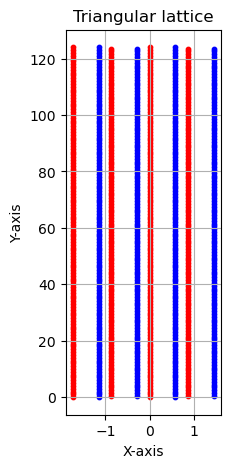

In [230]:
# Isolating a unit cell from SkX
unitcell1_x = []
unitcell1_y = []
unitcell2_x = []
unitcell2_y = []

unit = 20

# Bounds of unit cell
Xlow = - np.sqrt(3) * size/2
Xhigh = np.sqrt(3) * size/2
Ylow = 0
Yhigh = 5 * size + ((unit - 1) * 3 * size)

for i in range(len(subL1_x)):
    [x1, y1] = [subL1_x[i], subL1_y[i]]
    [x2, y2] = [subL2_x[i], subL2_y[i]]
    if x1 >= Xlow and x1 < Xhigh and y1 >= Ylow and y1 <= Yhigh:
        unitcell1_x.append(x1)  
        unitcell1_y.append(y1)
    if x2 >= Xlow and x2 < Xhigh and y2 >= Ylow and y2 <= Yhigh:
        unitcell2_x.append(x2)  
        unitcell2_y.append(y2)

print(len(unitcell1_x))
print(len(unitcell2_y))

g = plt.figure(figsize=(2,5))
plt.scatter(unitcell1_x, unitcell1_y, color='red', s=10)
plt.scatter(unitcell2_x, unitcell2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [231]:
L1NN1 = []
for j in range(len(unitcell1_y)):
    neig_L1_1(9, j)
print(L1NN1)

[8]


In [232]:
[None, 0, None, None, 2, None, 3, 4, 1, 6, 7, 8, 5, 10, 11]
Tx = [size * np.sqrt(3), 0]
# neighbour table formation
L1D1 = [-1/(2*np.sqrt(3)), -1/2]
L1D2 = [1/np.sqrt(3), 0]
L1D3 = [-1/(2*np.sqrt(3)), 1/2]
L2D1 = [1/(2*np.sqrt(3)), -1/2]
L2D2 = [1/(2*np.sqrt(3)), 1/2]
L2D3 = [-1/np.sqrt(3), 0]

L1NN1 = []
L1NN2 = []
L1NN3 = []
L2NN1 = []
L2NN2 = []
L2NN3 = []

def neig_L1_1(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D1[0] , y + L1D1[1]], 6)):
        L1NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D1[0] + Tx[0], y + L1D1[1] + Tx[1]], 6)):
        L1NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D1[0] + Tx[0], y + Yhigh + L1D1[1]], 6)):
        L1NN1.append(None)
    elif  (y +  L1D1[1]) < Ylow and np.allclose([x1, y1], np.round([x + L1D1[0], y + Yhigh + L1D1[1]], 6)):
        L1NN1.append(None)
    return 

def neig_L1_2(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D2[0] , y + L1D2[1]], 6)):
        L1NN2.append(j)
    return 

def neig_L1_3(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D3[0] , y + L1D3[1]], 6)):
        L1NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] + Tx[0], y + L1D3[1] + Tx[1]], 6)):
        L1NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] + Tx[0], y - Yhigh + L1D3[1]], 6)):
        L1NN3.append(None)
    elif y +  L1D3[1] > Yhigh and np.allclose([x1, y1], np.round([x + L1D3[0], y - Yhigh + L1D3[1]], 6)):
        L1NN3.append(None)
    return 

def neig_L2_1(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D1[0] , y + L2D1[1]], 6)):
        L2NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D1[0] - Tx[0], y + L2D1[1] - Tx[1]], 6)):
        L2NN1.append(j)
    elif np.round((y + L2D1[1]), 6) < Ylow and np.allclose([x1, y1], np.round([x + L2D1[0], y + Yhigh + L2D1[1]], 6)):
        L2NN1.append(None)
    return 

def neig_L2_2(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D2[0] , y + L2D2[1]], 6)):
        L2NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D2[0] - Tx[0], y + L2D2[1] - Tx[1]], 6)):
        L2NN2.append(j)
    elif (y + L2D2[1]) > Yhigh and np.allclose([x1, y1], np.round([x + L2D2[0], y - Yhigh + L2D2[1]], 6)):
        L2NN2.append(None)
    return 

def neig_L2_3(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D3[0] , y + L2D3[1]], 6)):
        L2NN3.append(j)
    return 

for i in tqdm(range(len(unitcell1_x))):
    for j in range(len(unitcell2_x)):
        neig_L1_1(i, j)
        neig_L1_2(i, j)
        neig_L1_3(i, j)

for i in tqdm(range(len(unitcell2_x))):
    for j in range(len(unitcell1_x)):
        neig_L2_1(i, j)
        neig_L2_2(i, j)
        neig_L2_3(i, j)
        
print(L1NN1)
print(L1NN2)
print(L1NN3)
print(L2NN1)
print(L2NN2)
print(L2NN3)

print(len(L1NN1))
print(len(L1NN2))
print(len(L1NN3))
print(len(L2NN1))
print(len(L2NN2))
print(len(L2NN3))

100%|██████████| 498/498 [00:51<00:00,  9.58it/s]

[None, 0, None, 2, 3, 4, 1, 6, 7, 8, 5, 10, 11, 12, 9, 14, 15, 16, 13, 18, 19, 20, 17, 22, 23, 24, 21, 26, 27, 28, 25, 30, 31, 32, 29, 34, 35, 36, 33, 38, 39, 40, 37, 42, 43, 44, 41, 46, 47, 48, 45, 50, 51, 52, 49, 54, 55, 56, 53, 58, 59, 60, 57, 62, 63, 64, 61, 66, 67, 68, 65, 70, 71, 72, 69, 74, 75, 76, 73, 78, 79, 80, 77, 82, 83, 84, 81, 86, 87, 88, 85, 90, 91, 92, 89, 94, 95, 96, 93, 98, 99, 100, 97, 102, 103, 104, 101, 106, 107, 108, 105, 110, 111, 112, 109, 114, 115, 116, 113, 118, 119, 120, 117, 122, 123, 124, 121, 126, 127, 128, 125, 130, 131, 132, 129, 134, 135, 136, 133, 138, 139, 140, 137, 142, 143, 144, 141, 146, 147, 148, 145, 150, 151, 152, 149, 154, 155, 156, 153, 158, 159, 160, 157, 162, 163, 164, 161, 166, 167, 168, 165, 170, 171, 172, 169, 174, 175, 176, 173, 178, 179, 180, 177, 182, 183, 184, 181, 186, 187, 188, 185, 190, 191, 192, 189, 194, 195, 196, 193, 198, 199, 200, 197, 202, 203, 204, 201, 206, 207, 208, 205, 210, 211, 212, 209, 214, 215, 216, 213, 218, 219, 22

In [233]:

# spin texture in unit cell
spins_cart_L1 = [spin_tex(unitcell1_x[i], unitcell1_y[i]) for i in range(len(unitcell1_x))]
spins_cart_L2 = [spin_tex(unitcell2_x[i], unitcell2_y[i]) for i in range(len(unitcell2_x))]

# getting the theta phi profile of skyrmion
def theta_profile(x, y, z):
    return np.arccos(z/np.linalg.norm([x, y, z]))
def phi_profile(x, y, z):
    [x, y, z] = np.round([x, y, z], 3)
    # Calculate the denominator and check for zero to avoid division by zero
    value = np.arctan2(y, x)
    if x == 0 and y == 0:
        return 0  # or some appropriate value or error handling
    elif value < 0:
        return value + (2* np.pi)
    else:
        return value

theta1 = [theta_profile(spins_cart_L1[i][0], spins_cart_L1[i][1], spins_cart_L1[i][2]) for i in range(len(unitcell1_x))]
phi1 = [phi_profile(spins_cart_L1[i][0], spins_cart_L1[i][1], spins_cart_L1[i][2]) for i in range(len(unitcell1_x))]
theta2 = [theta_profile(spins_cart_L2[i][0], spins_cart_L2[i][1], spins_cart_L2[i][2]) for i in range(len(unitcell2_x))]
phi2 = [phi_profile(spins_cart_L2[i][0], spins_cart_L2[i][1], spins_cart_L2[i][2]) for i in range(len(unitcell2_x))]


In [234]:

chi_ket_L1 = [[np.cos(theta1[i]/2), np.sin(theta1[i]/2) * np.exp(1j * phi1[i])] for i in range(len(unitcell1_x))]
chi_bra_L1 = [[np.cos(theta1[i]/2), np.sin(theta1[i]/2) * np.exp(-1j * phi1[i])] for i in range(len(unitcell1_x))]

chi_ket_L2 = [[np.cos(theta2[i]/2), np.sin(theta2[i]/2) * np.exp(1j * phi2[i])] for i in range(len(unitcell2_x))]
chi_bra_L2 = [[np.cos(theta2[i]/2), np.sin(theta2[i]/2) * np.exp(-1j * phi2[i])] for i in range(len(unitcell2_x))]

In [235]:
# Hamiltonian definition
t = 1
def H(kx):
    sub1 = len(unitcell1_x)
    sub2 = len(unitcell2_x)
    k = [kx, 0]
    Hij = np.zeros((sub1 + sub2, sub1 + sub2), dtype=np.complex128)
    for i in range(0,len(unitcell1_x)):
        if L1NN1[i] is not None :
            n1 = int(L1NN1[i])    
            Hij[i][n1 + sub1] += t * np.dot(chi_bra_L1[i], chi_ket_L2[n1]) * np.exp(1j * np.dot(k, L1D1))
        if L1NN2[i] is not None :
            n2 = int(L1NN2[i])  
            Hij[i][n2 + sub1] += t * np.dot(chi_bra_L1[i], chi_ket_L2[n2]) * np.exp(1j * np.dot(k, L1D2))
        if L1NN3[i] is not None :
            n3 = int(L1NN3[i])  
            Hij[i][n3 + sub1] += t * np.dot(chi_bra_L1[i], chi_ket_L2[n3]) * np.exp(1j * np.dot(k, L1D3))
            
    for i in range(0,len(unitcell2_x)): 
        if L2NN1[i] is not None :
            n4 = int(L2NN1[i])   
            Hij[i + sub1][n4] += t * np.dot(chi_bra_L2[i], chi_ket_L1[n4]) * np.exp(1j * np.dot(k, L2D1))
        if L2NN2[i] is not None :
            n5 = int(L2NN2[i]) 
            Hij[i + sub1][n5] += t * np.dot(chi_bra_L2[i], chi_ket_L1[n5]) * np.exp(1j * np.dot(k, L2D2))
        if L2NN3[i] is not None :
            n6 = int(L2NN3[i]) 
            Hij[i + sub1][n6] += t * np.dot(chi_bra_L2[i], chi_ket_L1[n6]) * np.exp(1j * np.dot(k, L2D3))
    return Hij  

In [236]:
np.allclose(H(2), np.conj(H(2).T))

True

In [237]:
BZ = np.linspace(-(np.pi)/(Tx[0]), (np.pi)/(Tx[0]), 100)

band = np.zeros((len(unitcell1_x) + len(unitcell2_x), len(BZ)))
for i in tqdm(range(0, len(BZ))):
    eigen = np.linalg.eigvalsh(H(BZ[i]))
    for b_index in range(0, len(unitcell1_x) + len(unitcell2_x)):
        band[b_index][i] = eigen[b_index]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:32<00:00,  3.05it/s]


(-3.0, 0.0)

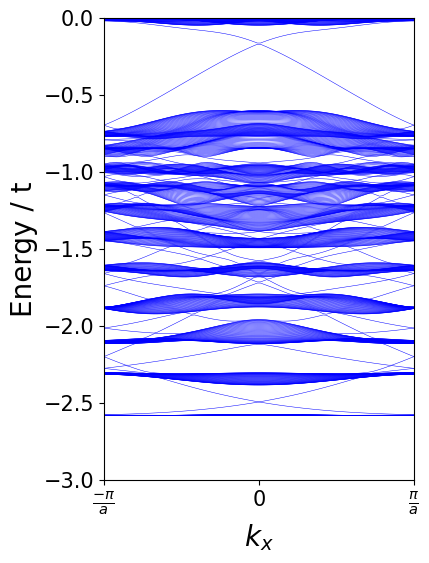

In [239]:
f = plt.figure(figsize=(4,6));   
for b_index in range(0, len(unitcell1_x) + len(unitcell2_x)):
    plt.plot( BZ, band[b_index], c = 'blue', linestyle='-', linewidth = 0.35 )
plt.xlabel("$k_x$", fontsize=20);plt.axis('tight')
plt.ylabel("Energy / t", fontsize=20)
# Customize x-axis ticks with Greek symbols
plt.yticks(fontsize = 15)
plt.xticks([BZ[0], 0, BZ[-1]],[r'$\frac{-\pi}{a}$', 0,  r'$\frac{\pi}{a}$'],fontsize=15)
plt.xlim(BZ[0], BZ[-1])
plt.ylim(-3, 0)

In [277]:
def sorted_kets(kx):
    eigenvalues, eigenvectors = np.linalg.eigh(H(kx))
    a = np.transpose(eigenvectors)
    return a

eigen_ket1 = np.zeros(len(unitcell1_x) + len(unitcell2_x))

band_index = 41

for i in tqdm(range(len(BZ))):
    ket1 = sorted_kets(BZ[i])[band_index]
    for j in range(len(unitcell1_x) + len(unitcell2_x)):
        eigen_ket1[j] += abs(ket1[j])**2
        
ele_prob1 = [eigen_ket1[i]/len(BZ)  for i in range(len(unitcell1_x) + len(unitcell2_x))]
print(np.sum(ele_prob1))

yindex = [Ylow + (i * 1/2) for i in range(int((Yhigh - Ylow) * 2) + 1)]
prob = []

unitcell_x = []
unitcell_y = []

for i in range(len(unitcell1_x)):
    unitcell_x.append(unitcell1_x[i])
    unitcell_y.append(unitcell1_y[i])
 
for i in range(len(unitcell2_x)):
    unitcell_x.append(unitcell2_x[i])
    unitcell_y.append(unitcell2_y[i])  
    

for row in range(len(yindex)):
    value = 0
    y = yindex[row]
    for i in range(len(unitcell_y)):
        if np.round(y, 6) == np.round(unitcell_y[i], 6):
            value += ele_prob1[i]
    prob.append(value)
    value = 0
    
f = plt.figure();   
plt.plot( yindex, prob, c = 'blue', linestyle='-', linewidth = 1 )
plt.scatter( yindex, prob, c = 'blue', s = 5 )
plt.xlabel("row index $ (\hat{y})$", fontsize=20);plt.axis('tight')
plt.ylabel("$|\psi|^2$", fontsize=20)
# Customize x-axis ticks with Greek symbols
plt.yticks(fontsize = 15)


 10%|█         | 10/100 [00:06<00:50,  1.78it/s]

In [276]:
print(np.sum(ele_prob1))
print(np.sum(prob))

1.0000000000000004
0.9785647273170645


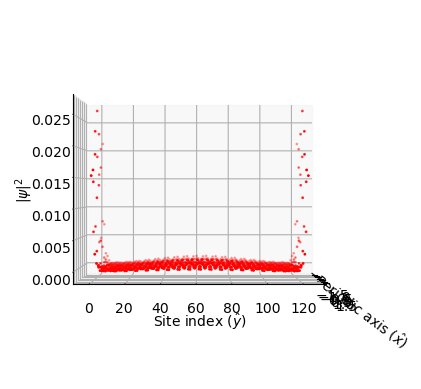

In [268]:

    
# Create grid values first
grid_x, grid_y = np.meshgrid(
    np.linspace(min(unitcell_x), max(unitcell_x), 100),
    np.linspace(min(unitcell_y), max(unitcell_y), 100)
)

# Interpolate z values on the grid
#grid_z = griddata((unitcell_x, unitcell_y), ele_prob, (grid_x, grid_y), method='cubic')

# Create a figure and a 3D Axes
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Plot the surface
#surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
# Highlight a specific data point
ax1.scatter(unitcell_x, unitcell_y, ele_prob1, color='red', s=1)

# Add labels
ax1.set_xlabel('Periodic axis ($\hat{x}$)')
ax1.set_ylabel('Site index ($\hat{y}$)')
ax1.set_zlabel('$|\psi|^2$', rotation=-90)
ax1.view_init(elev=  0, azim=0)
#ax1.set_yticks([0, -((2*D))*lamda/2,  -((2*D))*lamda])

#ax1.set_yticklabels([val, int(val/2), 0])
# Add a color bar
#fig.colorbar(surf)

# Show plot
plt.show()

